<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M1_AST_05_Numerical_Optimization_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 5: Numerical Optimization 

## Learning Objectives

At the end of the assignment, you will be able to

*   understand gradient descent 
* understand inexact linesearch method
* understand backtracking-goldstein condition



### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "M1_AST_05_Numerical_Optimization_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")  
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Import the required Packages


In [4]:
import pandas as pd
import numpy as np
import random
import pdb
from matplotlib import pyplot as plt

### Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function that minimizes a **cost function**.

It is used while training a machine learning model. It is an optimization algorithm, based on  first order gradients, that tweaks it’s parameters iteratively to minimize a given function to its local minimum and global minima if the function is convex.


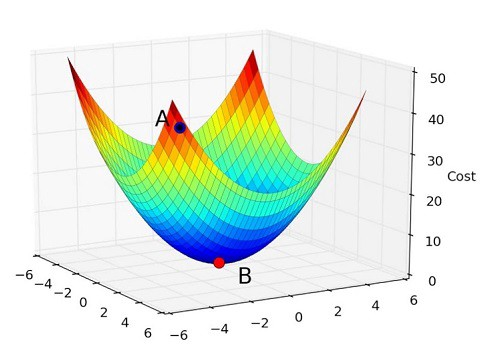

Further, a **cost function** is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. This is typically expressed as a difference or distance between the predicted value and the actual value.

1.Find the local minima of the function $y=(x+5)^{2}$ starting from the point x=3.

Initializing the parameters

In [5]:
# The algorithm starts at x=3
cur_x = 3
# Learning rate
rate = 0.01 
# This tells us when to stop the algorithm
precision = 0.000001 
previous_step_size = 1
# Maximum number of iterations 
max_iters = 10000
# Iteration counter 
iters = 0 
# Gradient of our function
f = lambda x: (x+5)**2
df = lambda x: 2*(x+5)

Run a loop to perform gradient descent. Stop the loop when difference between x values from 2 consecutive iterations is less than 0.000001 or when number of iterations exceeds 10,000.

In [6]:
# Declaring y_m and x_m for storing the values of f(cur_x) and cur_x
y_m = []
x_m = []
while previous_step_size > precision and iters < max_iters:
    # Store current x value in prev_x
    x_m.append(cur_x)
    y_m.append(f(cur_x))
    prev_x = cur_x 
    # Gradient descent
    cur_x = cur_x - rate * df(prev_x) 
    # Change in x
    previous_step_size = abs(cur_x - prev_x) 
    # Iteration count
    iters = iters+1 
    # Print iterations
    print("Iteration",iters,"\nX value is",cur_x) 
    
print("The local minimum occurs at", cur_x)

Iteration 1 
X value is 2.84
Iteration 2 
X value is 2.6832
Iteration 3 
X value is 2.529536
Iteration 4 
X value is 2.37894528
Iteration 5 
X value is 2.2313663744
Iteration 6 
X value is 2.0867390469119997
Iteration 7 
X value is 1.9450042659737599
Iteration 8 
X value is 1.8061041806542846
Iteration 9 
X value is 1.669982097041199
Iteration 10 
X value is 1.5365824551003748
Iteration 11 
X value is 1.4058508059983674
Iteration 12 
X value is 1.2777337898784
Iteration 13 
X value is 1.152179114080832
Iteration 14 
X value is 1.0291355317992152
Iteration 15 
X value is 0.9085528211632309
Iteration 16 
X value is 0.7903817647399662
Iteration 17 
X value is 0.6745741294451669
Iteration 18 
X value is 0.5610826468562635
Iteration 19 
X value is 0.44986099391913825
Iteration 20 
X value is 0.3408637740407555
Iteration 21 
X value is 0.23404649855994042
Iteration 22 
X value is 0.1293655685887416
Iteration 23 
X value is 0.026778257216966764
Iteration 24 
X value is -0.07375730792737258
It

Plotting the graph

([<matplotlib.axis.XTick at 0x7f5464b3f490>,
 <a list of 11 Text major ticklabel objects>)

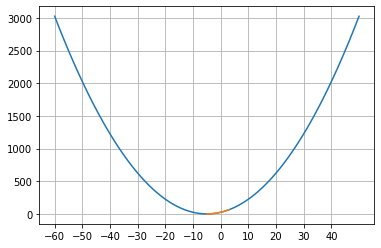

In [7]:
Xs = np.linspace(-60, 50, 100)
ys = f(Xs)
plt.plot(Xs, ys)
# Plotting the graph for x_m and y_m
plt.plot(x_m, y_m)
plt.grid(True)
plt.xticks(np.arange(-60, 50, 10))

The algorithm runs for 595 iterations before it terminates and the local minimum accurs at -4.9999518490318176

To learn more about Gradient Descent click [here](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1)

### Inexact Line Search Method

The primary idea behind the "Inexact Line Search Method" is to use numerous inexact line searches to identify a step-size by combining the current gradient with some prior search directions as a new search direction. We perform the following basic steps for implementing inexact line searcg method:

1. Formulate a criterion that assures that steps are neither too long nor too
short.

2. Pick a good initial stepsize.

3. Construct sequence of updates that satisfy the above criterion after very
few steps.

Further, to select the stepsize we use a method which is "**Backtracking Line Search**".

Now, let us understand algorithm of Backtracking Line Search.

**Backtracking Linesearch**: Below is the procedure to find the stepsize $\alpha_{k}$ using backtracking linesearch:

Given $\alpha_{init}>0$

Let $\alpha^{(0)} = \alpha_{init}$ and $l$=0

Until $f(x_{k}+\alpha^{(l)}p_{k})$ "<" $f_{k}$

  set $\alpha^{(l+1)} = \Gamma \alpha^{(l)}$, where $\Gamma \in (0,1)$

  and increase $l$ by 1

Set $\alpha_{k} = \alpha^{(l)}$

where $x_{k}$ is a vector showing current position,

$f_{k}$ is the position of vector at $x_{k}$

$p_{k}$ is a directional derivative

$\Gamma$ is a factor by which stepsize will decrease

Further let us see Goldstein Condition to find step length.



### Goldstein Conditions

Goldstein Conditions provide us another method to find an appropriate step length using the inequalities given below:

$ f(x_k) + (1-c)\alpha_k \nabla f^T_k p_k \le f(x_k + \alpha p_k) \le f(x_k) + c \alpha_k \nabla f^T_k p_k $

where c is a constant and 0 < c < 1

The figure shows the application of Goldstein Condition.
To learn more about Goldstein Conditions click  [here](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf)

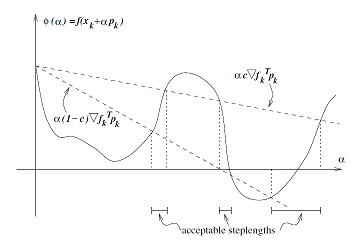

1. Implement inexact line search using Goldstein condition for the below equation: 

 $\;$f(X) = $ax^{2}+Bx^{}+c$


In [8]:
# Defining a function 'f' 
def f(X):
  a = 2
  B = np.array([4, 5])
  c = -6
  return a*X.T@X+B.T@X+c, 2*a*X+B
# X_0 is a vector or initial position 
X_0 = np.array([-5, 3],dtype = float)
m_0,g_0 = f(X_0)
print(m_0)
print(g_0)

57.0
[-16.  17.]


Defining a function to implement line search.

In [9]:
def linesearch(f, X):
  # Step size
  s=10
  # Factor by which the stepsize will decrease
  tau = 0.5
  # Defining m_0 and g_0 as xk and gk that are initial derivative and directional derivative
  m_0, g_0 = f(X)
  while True:
    m_1, g_1 = f(X+s*(-g_0))
    if  m_1 <= m_0:
      return s
    else:
      s=tau*s

Using the Goldstein Condition:

$f(x_k) + (1-c)\alpha_k \nabla f^T_k p_k \le f(x_k + \alpha p_k) \le f(x_k) + c \alpha_k \nabla f^T_k p_k$

In [10]:
def backtrack_goldstein(f, X):
  #pdb.set_trace()
  s = np.random.randint(-4,4)
  c  = 0.3 # 0 < c < 1/2 
  m_0, g_0 = f(X)
  step_sizes = np.linspace(-10, 10, 100)
  # Creating a list for storing the result of the function at each step
  f_eval = []
  for step in step_sizes:
    f_eval.append(f(X+step*(-g_0))[0])
  plt.plot(step_sizes, np.array(f_eval),label = 'S vs F')
  # Factor by which the stepsize will decrease
  tau = 0.5
  # dampening factor
  beta = 0.1
  # Creating a list for storing the result m_1 as well as step size
  ms = []
  ss = []
  while True:
    m_1, g_1 = f(X+s*(-g_0))
    ms.append(m_1)
    ss.append(s)
    # Applying the Backtracking-Goldstein condition  
    if  (f(X)[0] + (1-c)*s*(g_0.T@(-g_0)) <= f(X+s*(-g_0))[0] and (f(X+s*(-g_0))[0]<= f(X)[0] + (c)*s*(g_0.T@(-g_0)))):
      # Plotting the graph 
      plt.plot(ss, ms,'yo',label = 'Step sizes evaluated')
      plt.plot(ss[0],ms[0],'r*',label = 'Initial step size')
      plt.plot(ss[-1],ms[-1],'b*',label = 'Chosen step size')
      plt.title('Chosen Step size is {}'.format(ss[-1]))
      plt.xlabel('Step Size (s)')
      plt.ylabel('f(X+s*(-g))')
      plt.legend()
      plt.show()
      return s
    else:
      s=tau*s

In [11]:
def descent(f, X, step_search="goldstein"):
  #pdb.set_trace()
  count = 0
  while True:
    count += 1
    m_cur, g_cur = f(X)
    print (m_cur)
    if step_search=='linesearch':
      s = linesearch(f, X)
    elif step_search=="goldstein":
      s = backtrack_goldstein(f, X)
    X_new = X + s*(-g_cur)
    print (X_new)
    m_new, g_new = f(X_new)
    grad_norm = np.sqrt(np.sum(g_new.T@g_new)) # L2norm of gradient
    m_new, g_new = f(X_new)
    print('grad_norm:{}, current X: {}, next X: {}, current f: {}, Next f: {}, s: {}'.format(grad_norm, X, X_new, m_cur, m_new, s))
    if  grad_norm < 0.1:
      break
    X = X_new.copy()
  return X_new, count
 

In [12]:
# Implement linesearch 
X_0 = np.array([-3, 5])
descent(f, X_0, step_search="linesearch")

75
[-0.5    -2.8125]
grad_norm:6.562202374203344, current X: [-3  5], next X: [-0.5    -2.8125], current f: 75, Next f: -5.7421875, s: 0.3125
-5.7421875
[-1.125    -0.859375]
grad_norm:1.640550593550836, current X: [-0.5    -2.8125], next X: [-1.125    -0.859375], current f: -5.7421875, Next f: -10.78857421875, s: 0.3125
-10.78857421875
[-0.96875    -1.34765625]
grad_norm:0.410137648387709, current X: [-1.125    -0.859375], next X: [-0.96875    -1.34765625], current f: -10.78857421875, Next f: -11.103973388671875, s: 0.3125
-11.103973388671875
[-1.0078125  -1.22558594]
grad_norm:0.10253441209692725, current X: [-0.96875    -1.34765625], next X: [-1.0078125  -1.22558594], current f: -11.103973388671875, Next f: -11.123685836791992, s: 0.3125
-11.123685836791992
[-0.99804688 -1.25610352]
grad_norm:0.025633603024231812, current X: [-1.0078125  -1.22558594], next X: [-0.99804688 -1.25610352], current f: -11.123685836791992, Next f: -11.1249178647995, s: 0.3125


(array([-0.99804688, -1.25610352]), 5)

172


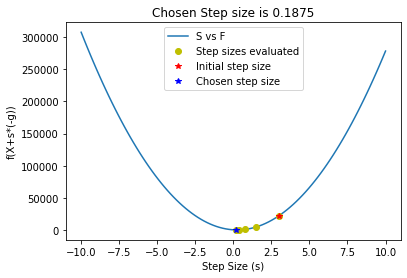

[-3.      0.0625]
grad_norm:9.56882960450232, current X: [-9  4], next X: [-3.      0.0625], current f: 172, Next f: 0.3203125, s: 0.1875
0.3203125


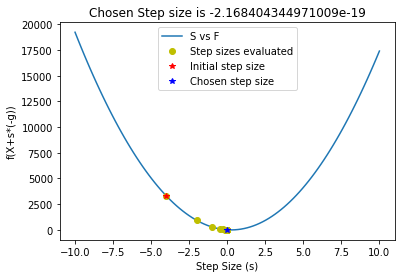

[-3.      0.0625]
grad_norm:9.56882960450232, current X: [-3.      0.0625], next X: [-3.      0.0625], current f: 0.3203125, Next f: 0.3203125, s: -2.168404344971009e-19
0.3203125


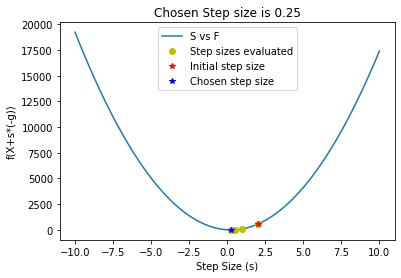

[-1.   -1.25]
grad_norm:0.0, current X: [-3.      0.0625], next X: [-1.   -1.25], current f: 0.3203125, Next f: -11.125, s: 0.25


(array([-1.  , -1.25]), 3)

In [13]:
# Implement  goldstein condition 
X_0 = np.array([-9, 4])
descent(f, X_0, step_search="goldstein")

Here, we get the step size as 0.25.

### Please answer the questions below to complete the experiment:




In [14]:
#@title Q.1. Determine the gradient of the function x^2-2*y^2-4*y+6 at (0,1). { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","i-4j", "0i+0j", "2i-8j", "0i-8j"]


In [15]:
#@title Q.2. Which parameter determines the size of the improvement step to take on each iteration of Gradient Descent? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","regularization parameter", "epoch", "learning rate", "batch size"]


In [16]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [17]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [18]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [19]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [20]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [21]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
